# Ejercicio I.

Continuamos con el ejercicio de los datos de LIDAR de la pr ́actica anterior.

La t ́ecnica conocida como LIDAR (light detection and ranging) usa la reflexi ́on de luz de
l ́aser emitida para detectar compuestos qu ́ımicos en la atm ́osfera. 

Esta t ́ecnica ha probado
ser una herramienta muy eficiente para el monitoreo de la distribuci ́on de diversos elementos
polulantes en la atm ́osfera (Sigrist, 1994).

En el archivo lidar.txt se encuentran datos medidos con a la t ́ecnica LIDAR. 

La variable
range es la distancia recorrida antes de que la luz sea reflejada de regreso hacia su fuente.

La variable logratio es el logaritmo del cociente de la luz recibida de dos fuentes de luz l ́aser
de distinta frecuencia.

El objetivo de esta gu ́ıa es comparar diferentes m ́etodos de predicci ́on, evaluando en un
test set. 

Antes de empezar, separe un 10% de los datos para conformar el test set que se
emplear ́a en la comparaci ́on final.

1. Por el m ́etodo de m ́ınimos cuadrados realice un ajuste de un modelo lineal polin ́omico de
grado 4 en range. Grafique los puntos observados y la funci ́on de regresi ́on estimada.

In [1]:
datos <- read.table('../clase24/lidar.txt', header=T)
colnames(datos)[2] <- 'logratio'
head(datos)

range,logratio
390.0,-0.05035573
391.5,-0.06009706
393.0,-0.04190091
394.5,-0.05098470
396.0,-0.05991345
397.5,-0.02842392


In [4]:
n <- length(datos$range)
n

[1] 221

In [10]:
train_n <- round(0.9*n)
test_n  <- round(0.1*n)
train_n
test_n

[1] 199

[1] 22

In [26]:
# Randomize data before separating test
set.seed(42)
rand_idx   <- sample(1:n, n, replace=F)
rand_train <- rand_idx[1:train_n]
rand_test  <- rand_idx[(train_n+1):n]
datos_train <- datos[rand_train,]
datos_test  <- datos[rand_test,]

In [27]:
head(datos_train)
head(datos_test)

,range,logratio
49,462.0,-0.00819836
65,486.0,-0.08027266
153,618.0,-0.56355580
74,499.5,-0.07530349
146,607.5,-0.52187920
122,571.5,-0.11786390


,range,logratio
135,591.0,-0.519027200
203,693.0,-0.859001700
88,520.5,-0.025276170
105,546.0,-0.003788664
174,649.5,-0.923823200
7,399.0,-0.059584210


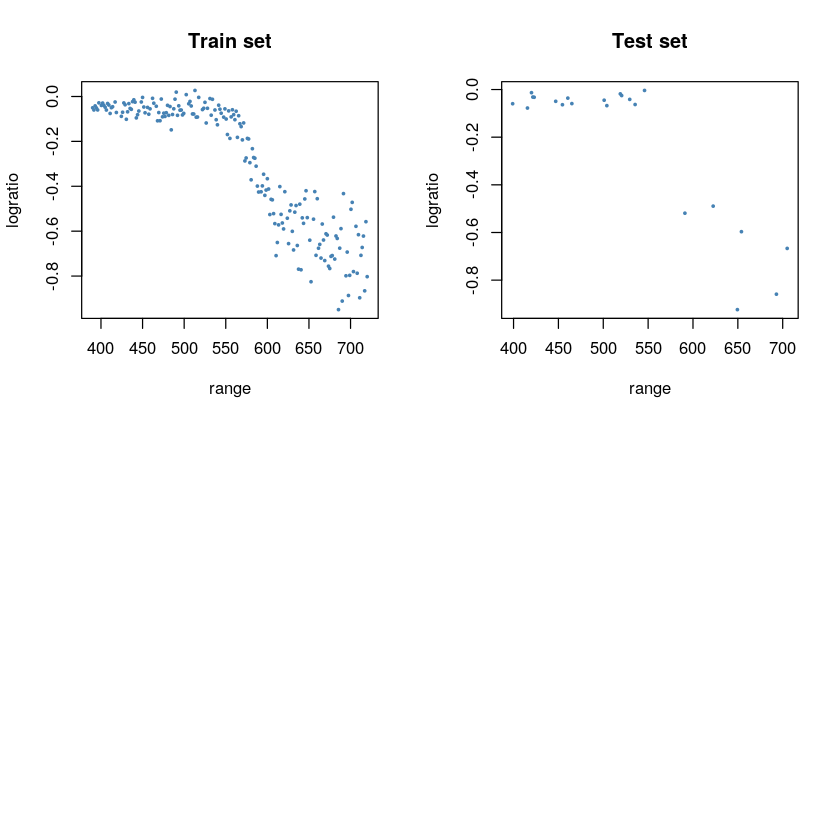

In [42]:
par(mfrow=c(2,2))
plot(datos_train, pch=20, cex=0.5, col="steelblue", main="Train set")
plot(datos_test, pch=20, cex=0.5, col="steelblue", main="Test set")

# $$\Large 1.$$

1. Por el m ́etodo de m ́ınimos cuadrados realice un ajuste de un modelo lineal polin ́omico de
grado 4 en range. 

  Grafique los puntos observados y la funci ́on de regresi ́on estimada.

In [66]:
library(MASS)

In [79]:
## 1°. Caso lineal con X lineal

In [97]:
# Agrego bias a X_train
bias <- rep(1, train_n)
X <- matrix(c(bias, datos_train[,1]), ncol=2)
Y <- as.matrix(datos_train[,2])

In [99]:
head(X)

1,462.0
1,486.0
1,618.0
1,499.5
1,607.5
1,571.5


In [100]:
XtX <- t(X) %*% X
XtY <- t(X) %*% Y

In [101]:
invXtX <- ginv(XtX)

$$\large \widehat{\Large{\beta}} = (\mathbf X' \mathbf X)^{-1} \mathbf X' \mathbf Y$$

In [111]:
best_beta <- invXtX %*% XtY
best_beta

1.150624360
-0.002595631


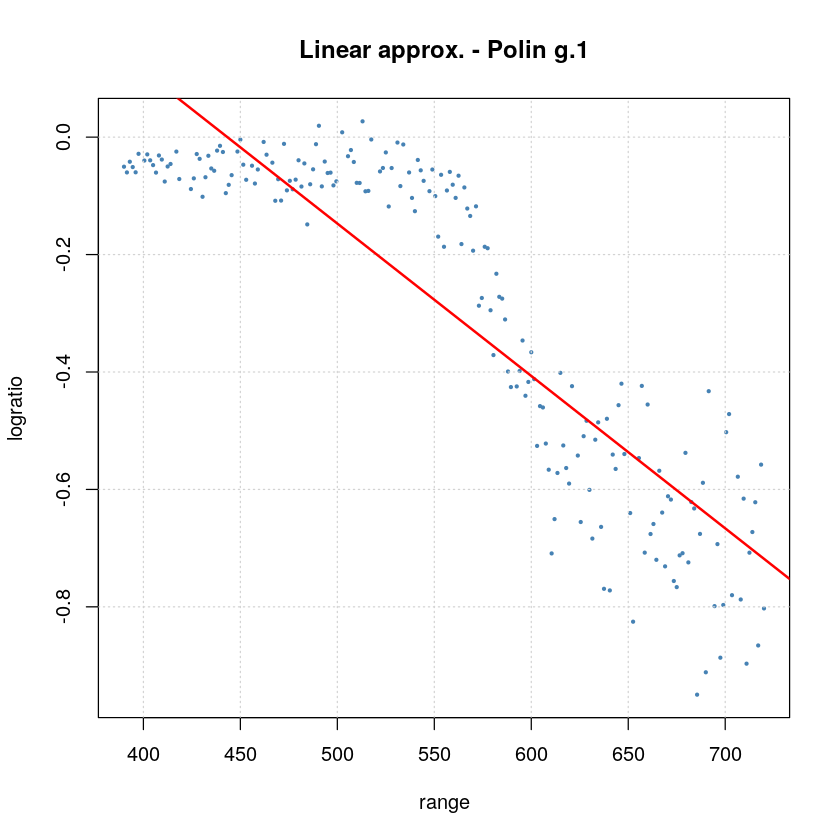

In [112]:
plot(datos_train, pch=20, cex=0.5, col="steelblue", main="Linear approx. - Polin g.1")
grid()
abline(a=best_beta[1], b=best_beta[2], col='red', lwd=2)

In [110]:
# Caso general:

In [329]:
append_dimensions <- function(X, p){
    # Armo columna con cada potencia de 1:p
    n <- length(X)
    X <- as.matrix(X, ncol=1)
    # Agrego bias a X_train
    bias <- as.matrix(rep(1, n), ncol=1)
    Xp <- bias
    if(p > 0){
        for(i in 1:p){
            Xi <- Xp[,i] * X
            Xp <- matrix(c(Xp, Xi), ncol=i+1)
        }
    }
    
    #Xp <- matrix(c(bias, Xp), ncol=p+1)
    return(Xp)
}
    

In [330]:
X3 <- append_dimensions(datos_train$range, p=3)
head(X3)

1,462.0,213444.0,98611128
1,486.0,236196.0,114791256
1,618.0,381924.0,236029032
1,499.5,249500.2,124625375
1,607.5,369056.2,224201672
1,571.5,326612.2,186658901


In [331]:
XtX <- t(X3) %*% X3
XtY <- t(X3) %*% Y

In [332]:
invXtX <- ginv(XtX)

$$\large \widehat{\Large{\beta}} = (\mathbf X' \mathbf X)^{-1} \mathbf X' \mathbf Y$$

In [333]:
best_beta <- invXtX %*% XtY
best_beta

2.264168e-11
8.339673e-09
2.346653e-06
-5.552558e-09


In [341]:
get_grid_polin <- function(grid_x, betas){
    n <- length(grid_x)
    p <- length(betas)-1
    bias <- as.matrix(rep(1, n))
    X <- as.matrix(grid_x)
    X_pol <- bias
    if(p>0){
        for(i in 1:p+1){
            Xi <- X_pol[,i-1] * X
            X_pol <- matrix(c(X_pol, Xi), ncol=i)
        }
    }
    
    #X_pol <- matrix(c(bias, X_pol), ncol=p+1)
    betas <- as.matrix(betas)
    Y_pol <- X_pol %*% betas
    return(Y_pol)
}

In [342]:
grid_x <- seq(300, 800, 5)
Y_grid <- get_grid_polin(grid_x, best_beta)

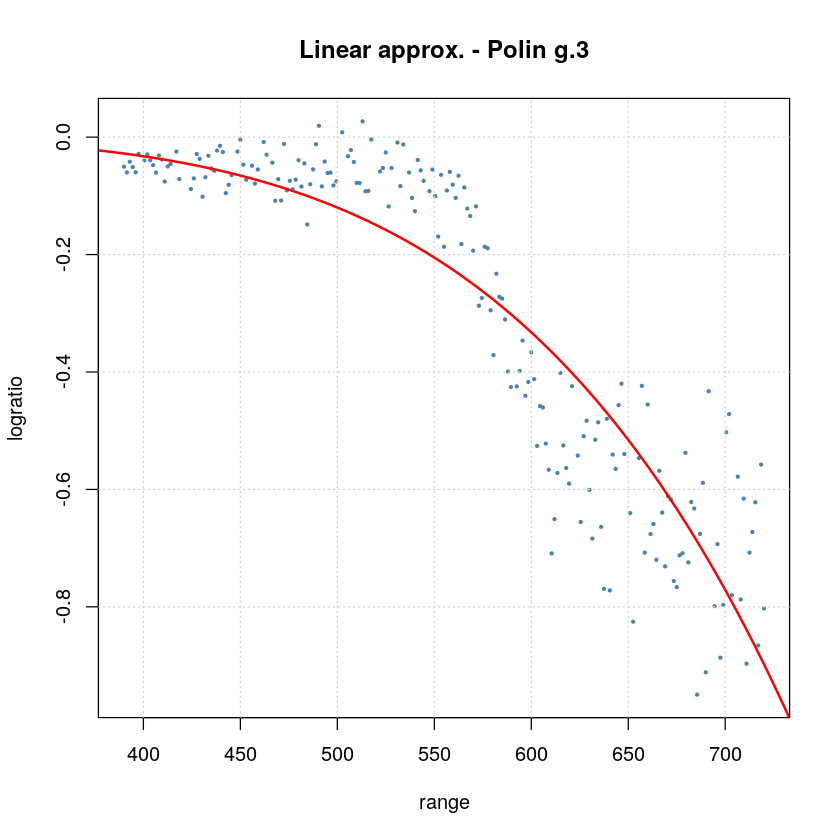

In [343]:
plot(datos_train, pch=20, cex=0.5, col="steelblue", main="Linear approx. - Polin g.3")
grid()
lines(grid_x, Y_grid, col='red', lwd=2)

$$\large \widehat{\Large{\beta}} = (\mathbf X' \mathbf X)^{-1} \mathbf X' \mathbf Y$$

In [355]:
p <- 5
grid_x <- seq(300, 800, 10)
Y_grid <- data.frame(rep(NA, length(grid_x)))
for (i in 0:p){
    Xp <- append_dimensions(datos_train$range, p=i)
    XtX <- t(Xp) %*% Xp
    XtY <- t(Xp) %*% Y
    invXtX <- ginv(XtX)
    best_beta <- invXtX %*% XtY
    Y_grid[, i+1] <- get_grid_polin(grid_x, best_beta)
    colnames(Y_grid)[i+1] <- paste0('X',i)
}
head(Y_grid)

X0,X1,X2,X3,X4,X5
-0.2995184,0.3719350,0.1665137,0.06128217,0.013035295,-0.005068697
-0.2995184,0.3459786,0.1597834,0.06009965,0.012351104,-0.006376031
-0.2995184,0.3200223,0.1522609,0.05835368,0.011350668,-0.007917210
-0.2995184,0.2940660,0.1439460,0.05601094,0.009997604,-0.009720797
-0.2995184,0.2681097,0.1348388,0.05303814,0.008253891,-0.011817523
-0.2995184,0.2421534,0.1249394,0.04940194,0.006079871,-0.014240362


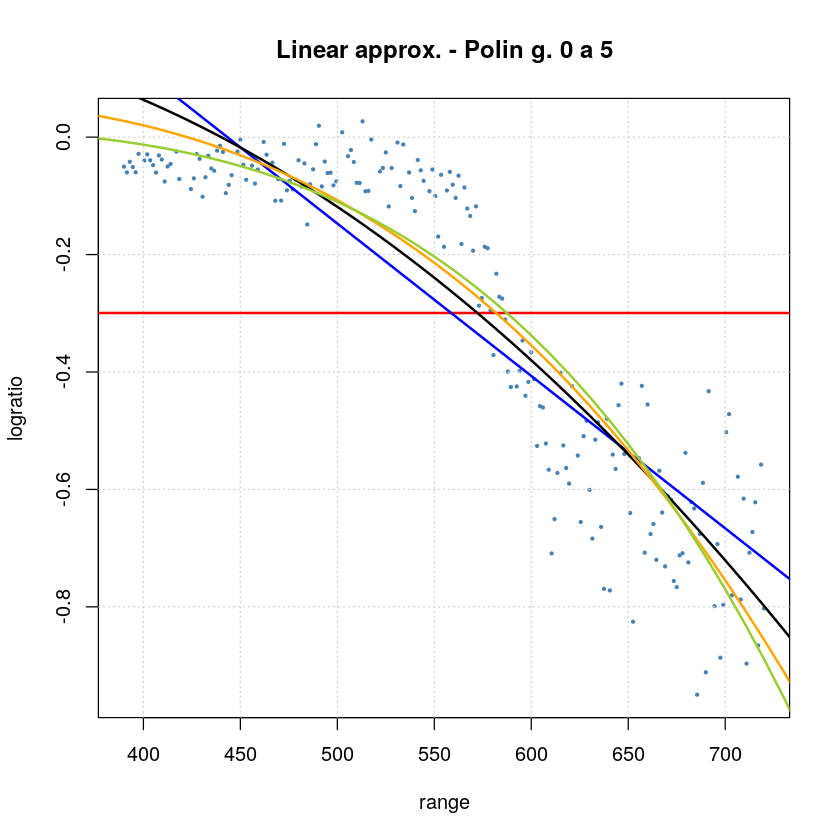

In [356]:
plot(datos_train, pch=20, cex=0.5, col="steelblue", main="Linear approx. - Polin g. 0 a 5")
grid()
lines(grid_x, Y_grid[,1], col='red', lwd=2)
lines(grid_x, Y_grid[,2], col='blue', lwd=2)
lines(grid_x, Y_grid[,3], col='black', lwd=2)
lines(grid_x, Y_grid[,4], col='orange', lwd=2)
lines(grid_x, Y_grid[,5], col='yellowgreen', lwd=2)

# $$\Large \mathcal 2.$$

2. Repita el item anterior considerando un modelo lineal polin ́omico de grado 9 y uno de
grado 10 en range. Grafique y compare.

In [358]:
p <- 10
grid_x <- seq(300, 800, 10)
Y_grid <- data.frame(rep(NA, length(grid_x)))
for (i in 0:p){
    Xp <- append_dimensions(datos_train$range, p=i)
    XtX <- t(Xp) %*% Xp
    XtY <- t(Xp) %*% Y
    invXtX <- ginv(XtX)
    best_beta <- invXtX %*% XtY
    Y_grid[, i+1] <- get_grid_polin(grid_x, best_beta)
    colnames(Y_grid)[i+1] <- paste0('X',i)
}
head(Y_grid)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
-0.2995184,0.3719350,0.1665137,0.06128217,0.013035295,-0.005068697,-0.004895871,-0.002170596,-0.0009497535,-0.0004114914,-0.0001769453
-0.2995184,0.3459786,0.1597834,0.06009965,0.012351104,-0.006376031,-0.005960361,-0.002730625,-0.0012346229,-0.0005527447,-0.0002456085
-0.2995184,0.3200223,0.1522609,0.05835368,0.011350668,-0.007917210,-0.007211111,-0.003410201,-0.0015916242,-0.0007355617,-0.0003373853
-0.2995184,0.2940660,0.1439460,0.05601094,0.009997604,-0.009720797,-0.008673331,-0.004229876,-0.0020358800,-0.0009702747,-0.0004589503
-0.2995184,0.2681097,0.1348388,0.05303814,0.008253891,-0.011817523,-0.010374704,-0.005212936,-0.0025850677,-0.0012693443,-0.0006186078
-0.2995184,0.2421534,0.1249394,0.04940194,0.006079871,-0.014240362,-0.012345549,-0.006385666,-0.0032597545,-0.0016477128,-0.0008266213


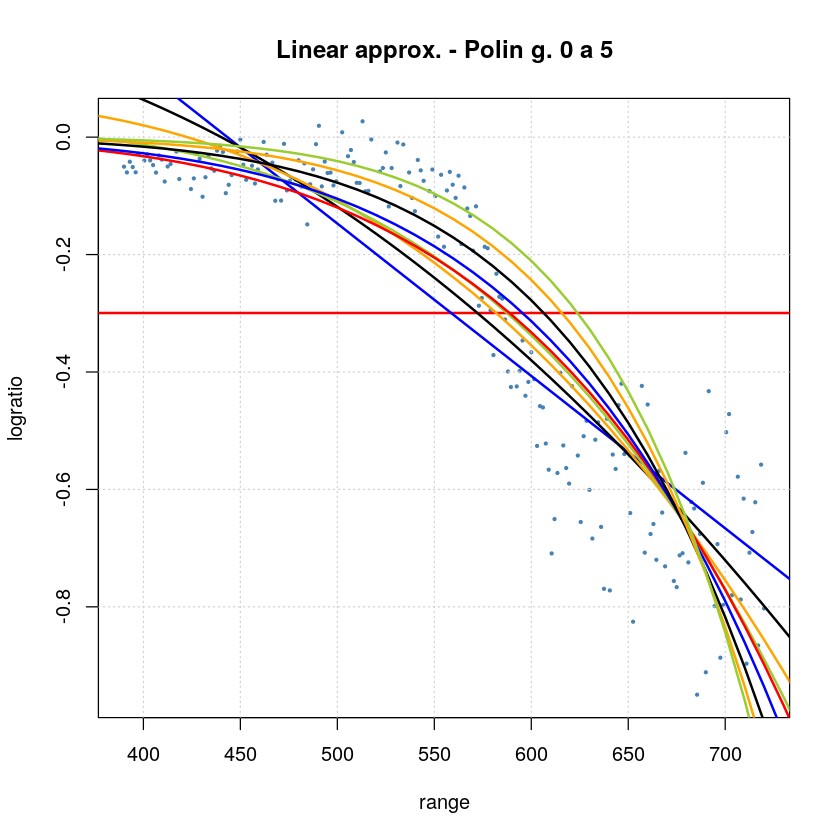

In [360]:
plot(datos_train, pch=20, cex=0.5, col="steelblue", main="Linear approx. - Polin g. 0 a 5")
grid()
lines(grid_x, Y_grid[,1], col='red', lwd=2)
lines(grid_x, Y_grid[,2], col='blue', lwd=2)
lines(grid_x, Y_grid[,3], col='black', lwd=2)
lines(grid_x, Y_grid[,4], col='orange', lwd=2)
lines(grid_x, Y_grid[,5], col='yellowgreen', lwd=2)
lines(grid_x, Y_grid[,6], col='red', lwd=2)
lines(grid_x, Y_grid[,7], col='blue', lwd=2)
lines(grid_x, Y_grid[,8], col='black', lwd=2)
lines(grid_x, Y_grid[,9], col='orange', lwd=2)
lines(grid_x, Y_grid[,10], col='yellowgreen', lwd=2)

# $$\Large \mathcal 3.$$

3. Considerando polin ́omios de grado 1 a 10 y elija con c ́ual propone predecir.

In [361]:

grid_x <- seq(300, 800, 10)
Y_grid <- data.frame(rep(NA, length(grid_x)))
i <- 1
for (p in c(1,10)){
    Xp <- append_dimensions(datos_train$range, p=p)
    XtX <- t(Xp) %*% Xp
    XtY <- t(Xp) %*% Y
    invXtX <- ginv(XtX)
    best_beta <- invXtX %*% XtY
    Y_grid[, i] <- get_grid_polin(grid_x, best_beta)
    colnames(Y_grid)[i] <- paste0('X',p)
    i <- i+1
}
head(Y_grid)

X1,X10
0.3719350,-0.0001769453
0.3459786,-0.0002456085
0.3200223,-0.0003373853
0.2940660,-0.0004589503
0.2681097,-0.0006186078
0.2421534,-0.0008266213


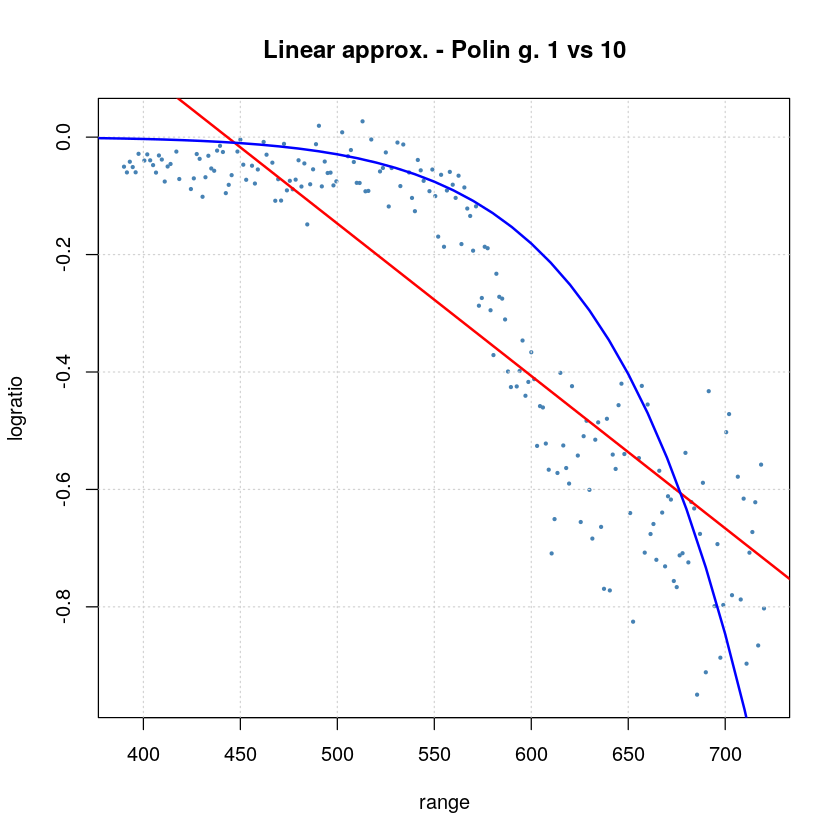

In [364]:
plot(datos_train, pch=20, cex=0.5, col="steelblue", main="Linear approx. - Polin g. 1 vs 10")
grid()
lines(grid_x, Y_grid[,1], col='red', lwd=2)
lines(grid_x, Y_grid[,2], col='blue', lwd=2)

# $$\Large \mathcal 4.$$

4. Considere polinomios hasta grado 10, regresi ́on por n ́ucleos Gaussianos y vecinos m ́as

cercanos. Determine en cada caso como predecir. Luego, eval ́ue los procedimientos prop-
uesta en el conjunto de testeo para eleg ́ır el m ́etodo que utilizar ́ıa en un nuevo valor de

x.